<a href="https://colab.research.google.com/github/albert-h-wong/DS-Unit-2-Sprint-3-Advanced-Regression/blob/master/DS_Unit_2_Sprint_Challenge_3vF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 2 Sprint Challenge 3

## Logistic Regression and Beyond

In this sprint challenge you will fit a logistic regression modeling the probability of an adult having an income above 50K. The dataset is available at UCI:

https://archive.ics.uci.edu/ml/datasets/adult

Your goal is to:

1. Load, validate, and clean/prepare the data.
2. Fit a logistic regression model
3. Answer questions based on the results (as well as a few extra questions about the other modules)

Don't let the perfect be the enemy of the good! Manage your time, and make sure to get to all parts. If you get stuck wrestling with the data, simplify it (if necessary, drop features or rows) so you're able to move on. If you have time at the end, you can go back and try to fix/improve.

### Hints

It has a variety of features - some are continuous, but many are categorical. You may find [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) (a method to one-hot encode) helpful!

The features have dramatically different ranges. You may find [sklearn.preprocessing.minmax_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html#sklearn.preprocessing.minmax_scale) helpful!

## Part 1 - Load, validate, and prepare data

The data is available at: https://archive.ics.uci.edu/ml/datasets/adult

Load it, name the columns, and make sure that you've loaded the data successfully. Note that missing values for categorical variables can essentially be considered another category ("unknown"), and may not need to be dropped.

You should also prepare the data for logistic regression - one-hot encode categorical features as appropriate.

In [1]:
# Import libraries that may be helpful

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Load data and rename columns and explored sample data

col_names = ['age', 'workclass', 'finalweight', 'educationlevel',
           'educationnumber', 'maritalstatus', 'occupation', 'relationship',
           'race','gender','capitalgain', 'capitalloss','hoursperweek',
           'nativecountry', 'incomelevel']

income_data = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
     header=None, names=col_names)
income_data.sample(15)

,age,workclass,finalweight,educationlevel,educationnumber,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,incomelevel
19525,47,Private,178341,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,46,United-States,>50K
6967,60,Private,230545,7th-8th,4,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,35,Cuba,<=50K
18905,41,Private,223548,1st-4th,2,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
18296,39,Private,63021,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,0,20,United-States,<=50K
15706,56,Self-emp-not-inc,50791,Masters,14,Divorced,Sales,Not-in-family,White,Male,0,1876,60,United-States,<=50K
8236,42,Private,52781,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K
1463,39,Private,51100,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,>50K
4285,59,Private,168569,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,1887,40,United-States,>50K
31451,36,Private,199346,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,50,United-States,>50K
23001,29,Private,337693,5th-6th,3,Never-married,Other-service,Own-child,White,Female,0,0,40,El-Salvador,<=50K


In [3]:
income_data.shape

(32561, 15)

In [4]:
income_data.dtypes

age                 int64
workclass          object
finalweight         int64
educationlevel     object
educationnumber     int64
maritalstatus      object
occupation         object
relationship       object
race               object
gender             object
capitalgain         int64
capitalloss         int64
hoursperweek        int64
nativecountry      object
incomelevel        object
dtype: object

In [5]:
# Checked for any missing values, none shown but ? showed up in sample data

income_data.isna().sum()

age                0
workclass          0
finalweight        0
educationlevel     0
educationnumber    0
maritalstatus      0
occupation         0
relationship       0
race               0
gender             0
capitalgain        0
capitalloss        0
hoursperweek       0
nativecountry      0
incomelevel        0
dtype: int64

In [6]:
# Check for missing values denoted in different form and replace ? with NaN

df = income_data.replace(' ?', np.nan)
df.isna().sum()

age                   0
workclass          1836
finalweight           0
educationlevel        0
educationnumber       0
maritalstatus         0
occupation         1843
relationship          0
race                  0
gender                0
capitalgain           0
capitalloss           0
hoursperweek          0
nativecountry       583
incomelevel           0
dtype: int64

In [7]:
# Dropped columns that will not be used for logistic regression or will not be
# engineered or encoded

df.columns.drop(['occupation','nativecountry','finalweight', 'relationship'])

Index(['age', 'workclass', 'educationlevel', 'educationnumber',
       'maritalstatus', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'incomelevel'],
      dtype='object')

In [8]:
# Cleaned NaN data in workclass column by replacing with 0 which will be
# the equate missing values as the same as any form of unemployment

df['workclass'].fillna(0, inplace=True)
df.isna().sum()

age                   0
workclass             0
finalweight           0
educationlevel        0
educationnumber       0
maritalstatus         0
occupation         1843
relationship          0
race                  0
gender                0
capitalgain           0
capitalloss           0
hoursperweek          0
nativecountry       583
incomelevel           0
dtype: int64

In [0]:
# Wrangle data to binary employment status, employment seems like an important
# factor in relationship of income

df.workclass.replace({' Private' : 1, ' Local-gov' : 1, ' State-gov' : 1,
                             ' Self-emp-not-inc' : 1, ' Without-pay' : 0,
                             ' Self-emp-inc': 1, ' Never-worked' : 0,
                             ' Federal-gov' : 1}, inplace=True)

In [0]:
# Wrangle data to binary gender

df.gender.replace({' Female' : 0, ' Male': 1}, inplace=True)

In [0]:
# Wrangle data to binary marriage status, may be interesting to see if marital
# status has any correlation with individuals' income, potentially because of
# family responsibility

df.maritalstatus.replace({' Married-civ-spouse' : 1, ' Divorced' : 0, ' Separated' : 0,
                             ' Widowed' : 0, ' Never-married' : 0,
                             ' Married-AF-spouse': 1, ' Married-spouse-absent' : 1}, inplace=True)

In [0]:
# Wrangle data to binary education level of Bachelors degree and above to see if
# there's some relationship for attaining higher salary income with college degree

df.educationlevel.replace({' Bachelors' : 1, ' Some-college' : 0, ' 11th' : 0, ' 12th' : 0,
                             ' Prof-school' : 0, ' HS-grad' : 0, ' 7th-8th' : 0,
                             ' Assoc-acdm': 0, ' Assoc-voc' : 0, ' 9th' : 0, 
                             ' Masters' : 1, ' 1st-4th' : 0, ' 10th' : 0, 
                             ' Doctorate' : 1, " 5th-6th" : 0, ' Preschool' : 0}, 
                      inplace=True)

In [0]:
# Wrangle data to binary threshold of greater than $50k salary

df.incomelevel.replace({' <=50K' : 0, ' >50K': 1}, inplace=True)

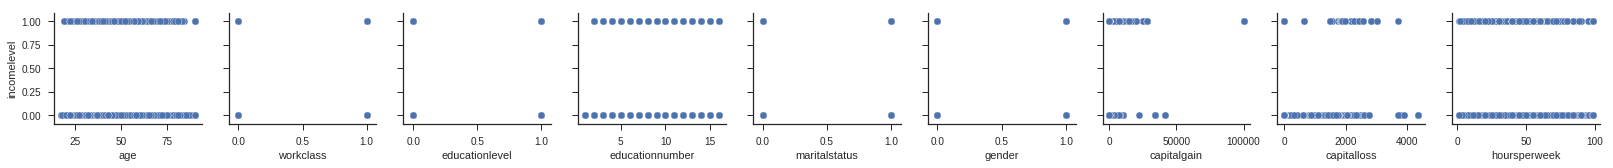

In [14]:
# Data exploration with pairplots to compare X variables with income level but
# not much stands out

sns.set(style="ticks", color_codes=True)

x_columns = df.columns.drop(['incomelevel','finalweight','race','nativecountry','relationship','occupation'])

sns.pairplot(data=df, y_vars=['incomelevel'], x_vars=x_columns)


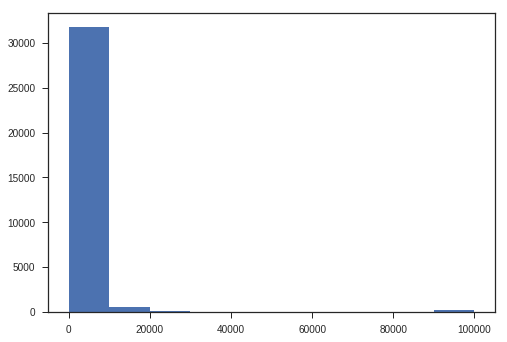

In [16]:
# Double check histogram of capital gain for outliers

plt.hist(df.capitalgain);

In [0]:
# Get rid the large capital gain outlier based on 3x of std away from mean

df = df[np.abs(df.capitalgain-df.capitalgain.mean()) <= (3*df.capitalgain.std())]

In [18]:
# Check for max in capital gain, the number feels a bit more acceptable to keep in DF

df.loc[df['capitalgain'].idxmax()]

age                              61
workclass                         1
finalweight                   32423
educationlevel                    0
educationnumber                   9
maritalstatus                     1
occupation          Farming-fishing
relationship                   Wife
race                          White
gender                            0
capitalgain                   22040
capitalloss                       0
hoursperweek                     40
nativecountry         United-States
incomelevel                       0
Name: 3593, dtype: object

In [19]:
# Check summary descriptive stats for spread and scaling of variables

df.describe()

,age,workclass,finalweight,educationlevel,educationnumber,maritalstatus,gender,capitalgain,capitalloss,hoursperweek,incomelevel
count,32346.000000,32346.000000,3.234600e+04,32346.000000,32346.000000,32346.000000,32346.000000,32346.000000,32346.000000,32346.000000,32346.000000
mean,38.532771,0.942868,1.897869e+05,0.228467,10.062233,0.472361,0.668151,544.492178,87.884128,40.382860,0.235980
std,13.639102,0.232099,1.055598e+05,0.419852,2.562870,0.499243,0.470885,2286.322055,404.234178,12.324166,0.424616
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.000000,1.178330e+05,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.000000,1.784030e+05,0.000000,10.000000,0.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,1.000000,2.370650e+05,0.000000,12.000000,1.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.000000,1.484705e+06,1.000000,16.000000,1.000000,1.000000,22040.000000,4356.000000,99.000000,1.000000


In [21]:
# Check for key variables to target and collinearity, education level and education
# number are the only variables that may have some collinearity

df.corr()

,age,workclass,finalweight,educationlevel,educationnumber,maritalstatus,gender,capitalgain,capitalloss,hoursperweek,incomelevel
age,1.000000,-0.042586,-0.076849,0.077744,0.031956,0.318341,0.088035,0.122078,0.058760,0.066829,0.230540
workclass,-0.042586,1.000000,0.003453,0.060029,0.078690,0.053076,0.064990,0.025144,0.016758,0.169849,0.079082
finalweight,-0.076849,0.003453,1.000000,-0.019193,-0.043521,-0.026280,0.026771,-0.002722,-0.010304,-0.019177,-0.009179
educationlevel,0.077744,0.060029,-0.019193,1.000000,0.706645,0.088683,0.036181,0.123567,0.069244,0.116684,0.284776
educationnumber,0.031956,0.078690,-0.043521,0.706645,1.000000,0.076141,0.009018,0.143957,0.082074,0.142648,0.327736
maritalstatus,0.318341,0.053076,-0.026280,0.088683,0.076141,1.000000,0.421671,0.133565,0.078899,0.210291,0.436720
gender,0.088035,0.064990,0.026771,0.036181,0.009018,0.421671,1.000000,0.067020,0.046176,0.227673,0.214776
capitalgain,0.122078,0.025144,-0.002722,0.123567,0.143957,0.133565,0.067020,1.000000,-0.051778,0.085594,0.319481
capitalloss,0.058760,0.016758,-0.010304,0.069244,0.082074,0.078899,0.046176,-0.051778,1.000000,0.055511,0.154577
hoursperweek,0.066829,0.169849,-0.019177,0.116684,0.142648,0.210291,0.227673,0.085594,0.055511,1.000000,0.224802


In [25]:
# Use scaler to adjust variables that have large variance, chose to scale the 
# capital gains and capital loss variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['capitalgain','capitalloss']] = scaler.fit_transform(df[['capitalgain','capitalloss']])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [26]:
df.describe()

,age,workclass,finalweight,educationlevel,educationnumber,maritalstatus,gender,capitalgain,capitalloss,hoursperweek,incomelevel
count,32346.000000,32346.000000,3.234600e+04,32346.000000,32346.000000,32346.000000,32346.000000,32346.000000,32346.000000,32346.000000,32346.000000
mean,38.532771,0.942868,1.897869e+05,0.228467,10.062233,0.472361,0.668151,0.024705,0.020175,40.382860,0.235980
std,13.639102,0.232099,1.055598e+05,0.419852,2.562870,0.499243,0.470885,0.103735,0.092799,12.324166,0.424616
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.000000,1.178330e+05,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.000000,1.784030e+05,0.000000,10.000000,0.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,1.000000,2.370650e+05,0.000000,12.000000,1.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.000000,1.484705e+06,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,99.000000,1.000000


In [27]:
# Added dummies for race variable

dummy = pd.get_dummies(df['race'])
dummy.head()

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0


In [0]:
# Added dummies to DF
df = pd.concat([df,dummy], axis=1)

In [29]:
# Checked correlations again and found race is not a big factor to income levels
df.corr()

,age,workclass,finalweight,educationlevel,educationnumber,maritalstatus,gender,capitalgain,capitalloss,hoursperweek,incomelevel,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
age,1.000000,-0.042586,-0.076849,0.077744,0.031956,0.318341,0.088035,0.122078,0.058760,0.066829,0.230540,-0.009799,-0.011484,-0.017990,-0.034977,0.032437
workclass,-0.042586,1.000000,0.003453,0.060029,0.078690,0.053076,0.064990,0.025144,0.016758,0.169849,0.079082,-0.009966,-0.004760,-0.016750,-0.011194,0.021987
finalweight,-0.076849,0.003453,1.000000,-0.019193,-0.043521,-0.026280,0.026771,-0.002722,-0.010304,-0.019177,-0.009179,-0.064246,-0.051412,0.118151,0.006661,-0.057149
educationlevel,0.077744,0.060029,-0.019193,1.000000,0.706645,0.088683,0.036181,0.123567,0.069244,0.116684,0.284776,-0.031611,0.070160,-0.071760,-0.015777,0.037874
educationnumber,0.031956,0.078690,-0.043521,0.706645,1.000000,0.076141,0.009018,0.143957,0.082074,0.142648,0.327736,-0.028762,0.061618,-0.074220,-0.045262,0.050971
maritalstatus,0.318341,0.053076,-0.026280,0.088683,0.076141,1.000000,0.421671,0.133565,0.078899,0.210291,0.436720,-0.013623,0.019915,-0.120704,-0.006182,0.096297
gender,0.088035,0.064990,0.026771,0.036181,0.009018,0.421671,1.000000,0.067020,0.046176,0.227673,0.214776,-0.010868,-0.001070,-0.114994,-0.014266,0.103272
capitalgain,0.122078,0.025144,-0.002722,0.123567,0.143957,0.133565,0.067020,1.000000,-0.051778,0.085594,0.319481,-0.000300,-0.003973,-0.026463,-0.013874,0.027734
capitalloss,0.058760,0.016758,-0.010304,0.069244,0.082074,0.078899,0.046176,-0.051778,1.000000,0.055511,0.154577,-0.013043,0.004652,-0.022047,-0.005972,0.021243
hoursperweek,0.066829,0.169849,-0.019177,0.116684,0.142648,0.210291,0.227673,0.085594,0.055511,1.000000,0.224802,-0.002876,-0.004842,-0.052391,-0.008342,0.049115


## Part 2 - Fit and present a Logistic Regression

Your data should now be in a state to fit a logistic regression. Use scikit-learn, define your `X` (independent variable) and `y`, and fit a model.

Then, present results - display coefficients in as interpretible a way as you can (hint - scaling the numeric features will help, as it will at least make coefficients more comparable to each other). If you find it helpful for interpretation, you can also generate predictions for cases (like our 5 year old rich kid on the Titanic) or make visualizations - but the goal is your exploration to be able to answer the question, not any particular plot (i.e. don't worry about polishing it).

It is *optional* to use `train_test_split` or validate your model more generally - that is not the core focus for this week. So, it is suggested you focus on fitting a model first, and if you have time at the end you can do further validation.

In [30]:
# Run logistic regression on income level with selected numerical continuous
# and encoded binary variables

X = df[['age', 'workclass', 'educationlevel', 'educationnumber', 'maritalstatus', 'gender', 'capitalgain', 'capitalloss', 'hoursperweek']]
y = df.incomelevel

log_reg1 = LogisticRegression().fit(X, y)
log_reg1.score(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8402584554504421

In [31]:
# Check the coefficients of the variables

log_reg1.coef_

array([[0.02770035, 0.75809347, 0.09920592, 0.33463199, 2.3174117 ,
        0.15434917, 7.0993922 , 2.87203899, 0.02884342]])

In [32]:
# Adjust the log odds to odd ratio for easier interpretation

np.exp(log_reg1.coef_)

array([[1.02808757e+00, 2.13420342e+00, 1.10429367e+00, 1.39742602e+00,
        1.01493706e+01, 1.16689826e+00, 1.21123066e+03, 1.76730165e+01,
        1.02926342e+00]])

**Age: 1.0280** - Individual is 2.8% more likely to be above the $50k income level with each year increase in age

**Workclass: 2.134** - Individual is 2 times more likely to be above the $50k income level if they are employed

**Education Level: 1.104** - Individual is 10.4% more likely to be above the $50k income level with a bachelors degree or above

**Education Number: 1.397** - Individual is 39.7% more likely to be above the $50k income level with each unit increase in education number achieved

**Marital Status: 10.014** - Individual is 10 times more likely to be above the $50k income level if they are married

**Gender: 1.166** - Individual is 16.6% more likely to be above the $50k income level if they are male

**Capital Gain: 1.211x10^3** - Individual is over a thousand times more likely to be above the 50k income level with every relative percentile increase from the base max capital gains (1% * $22k max) 

**Capital Loss: 17.673** - Individual is over 17 times more likely to be above the $50k income level with every relative percentile increase of max capital loss compared to the other observations

**Hours per Week: 1.029** - Individual is over 2.9% more likely to be above the $50k income level with every 1 hour increase in work per week


In [33]:
# Calculate the intercept, the relatively large negative intercept indicates how
# the X variables all tend to be more of positive correlation to income. An increase
# whether by unit or relative percentage in it are positive to increase an income
# whereas a 0 or decrease would be highly likely to signify salary below the threshold

log_reg1.intercept_

array([-9.68684921])

In [0]:
# Created a couple test cases for prediction example

test_case1 = np.array([[40, 1, 1, 13, 1, 1, .1, 0, 60]])
test_case2 = np.array([[20, 0, 1, 13, 0, 1, 0, 0, 0]])


In [35]:
# Returned the probability of income level based on test case characteristics

print(log_reg1.predict_proba(test_case1)[0])
print(log_reg1.predict_proba(test_case2)[0])

[0.17639211 0.82360789]
[0.9893245 0.0106755]


In [36]:
# Defined the sigmoid function for directly calculating the test case probability
def sigmoid(x):
  return 1 / (1 + np.e**(-x))
sigmoid(log_reg1.intercept_ + np.dot(log_reg1.coef_, np.transpose(test_case1)))

array([[0.82360789]])

## Part 3 - Analysis, Interpretation, and Questions

### Based on your above model, answer the following questions

1. What are 3 features positively correlated with income above 50k?
2. What are 3 features negatively correlated with income above 50k?
3. Overall, how well does the model explain the data and what insights do you derive from it?

*These answers count* - that is, make sure to spend some time on them, connecting to your analysis above. There is no single right answer, but as long as you support your reasoning with evidence you are on the right track.

Note - scikit-learn logistic regression does *not* automatically perform a hypothesis test on coefficients. That is OK - if you scale the data they are more comparable in weight.

### Match the following situation descriptions with the model most appropriate to addressing them

In addition to logistic regression, a number of other approaches were covered this week. Pair them with the situations they are most appropriate for, and briefly explain why.

Situations:
1. You are given data on academic performance of primary school students, and asked to fit a model to help predict "at-risk" students who are likely to receive the bottom tier of grades.
2. You are studying tech companies and their patterns in releasing new products, and would like to be able to model and predict when a new product is likely to be launched.
3. You are working on modeling expected plant size and yield with a laboratory that is able to capture fantastically detailed physical data about plants, but only of a few dozen plants at a time.

Approaches:
1. Ridge Regression
2. Quantile Regression
3. Survival Analysis

# **Model Interpretation**

1. The 3 features that most positively correlated with income greater than $50k in the model was capital gains, capital losses, and marital status. The capital gains and losses may indicate that individuals are financially stable enough to make investments which may be more correlated to individuals that make a higher relative income. Marital status was also positively correlated which could indicate that individuals that are more stabilized in a family relationship with dependents and family financial responsibilities may be more likely to earn a higher relative income. 

2. There were no features in my analysis that indicated a negative correlation to above the income threshold. There were some very tiny negative correlation that is much closer to zero correlation in race that does not appear significant. The variables available in the data were all generally more positive correlations to varying degrees as a unit or relative increase in the variables tends to correlate with more positive inclination towards a higher relative income. Age and hours per week were the weakest variables but still not a negative relationship with income threshold.

3. Overall the model had a score of 0.84 which is a solid fit for the data. By intuition as noted above, many of the variables were likely to be positively correlated with income levels but the key takeaways is the relative differences in the coefficients of the variables. Capital gains and losses were highly sensitive variables that drove prediction. The score could be higher if the outlier value was included. Much of the data in those variables were 0 but for the observations that did have investments he or she were very much likely to earn a higher relative income. Many lower income individuals do not have the benefit or stability for passive income and likely have to spend all or at least spend and save all of their income. Individuals that already earn a higher income are more likely to have additional funds net of expenditures and savings to be able to afford making investments. Hours per week although positive was not as strong as expected which may indicate that the wage per hour or salaried individuals with stable hours is a better indicator of income than the absolute hours worked. Employment is clearly important for insight into income but was not as strong of a positive correlation as I would had initially expected. Possibly some individuals did not answer in the data since there were ?/missing values in workclass potentially from a complicated set of available answers. It is also an indication that there is quite a variance in income or wages even in a highly employed population and the number of informal employment even in a developed economy. The education variables were also a bit noisy with the number of options and it was unclear how the education number was standardized. I tried to narrow it down to a binary feature of bachelor's degree and above since much of the research has indicated the income disparities of individuals that do not attain a college and above degree. 

# **Model - Situation Matching**

1. **Student grade performance: Quantile Regression**
For the purposes of this analysis, we are focused on identifying a segmented group of students that are performing below a certain threshold of academic performance. By using quantile regression we can select a particular quantile as the target or cutoff rate where we can assess students' (observations) performance below and above the quantile. By analyzing the data below the quantile of grade performance, we can better understand the variables that show a common relationship with the segmented group and help predict which students demonstrating similar lagging indicators of performance may be "at-risk" of resulting below the targeted tier of grades.

2. **Tech company product launch: Survival Analysis** 
This analysis would entail looking at a historical data analysis of time before an event is reached. In this case, we would set the event as a product launch and examine the time it takes for each tech company in the universe of the study to reach the next product launch. Unlike traditional survival analysis where the event is some type of failure, this would be a positive event. Censored data in this case would be the companies that continue to operate but have not launched a product within the timeframe of the study. We would examine a variety of company metrics as variables that most associate to a product launch. The data would have to include a measurable time variable and a binary launch (or not ) event as the dependent variable that ties to the observations. 

3. **Plant size and yield: Ridge Regression** 
Given that a limited number of plants can be studied in a given time but with great detailed physical data, this would indicate that there are fewer observations (n) but potentially many variables in the parameter that could lead to P>N or insufficient sample size ratio to independent variables that leads to overfitting the data. By using a ridge regression we can tune a model for this smaller sample study by smoothing the regression and minimizing the large swing in the slopes of the coefficients of the variables that may be too sensitive to the parameters. We can do this by investigating the alpha to see how we can add regularization or optimize the model by adjusting the "penalty" (alpha).